# Classification Model

We will use multiple classification model to predict and analyze why its different between each model. We will put some trick and method to process and tuning the model.
## SGD with MNIST Data
MNIST is a dataset of images, The images in this dataset are number from 0 to 9 in different kind of shape. We will visualize one of the data in dataset later

In [13]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
len(mnist)

9

The shape of the data is 70000 and 784. 70000 is the total of sample in data. 784 is dimension of each sample. Its from the total dimension of 28x28 image.


In [108]:
X, y = mnist['data'], mnist['target']
X = X/256
y = y.astype('float')

In [109]:
print("X Shape {}\ny shape {}\n\nX top 10 row data\n{}\n\ny top 10 row data\n{}".format(X.shape, y.shape,X[:10],y[:10]))

X Shape (70000, 784)
y shape (70000,)

X top 10 row data
   pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
5     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
6     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
7     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
8     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
9     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0

[10 rows x 784 columns]

y top 10 row data
0    5.0
1    0.0
2    4.0
3  

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize(x):
  img = np.asarray(x).reshape(28,28)
  plt.imshow(img)
  return

We will visualize one of the data in MNIST data

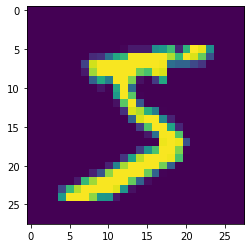

In [111]:
visualize(X.loc[0])

In [114]:
target_number = 1
y_target = np.where(y==target_number)

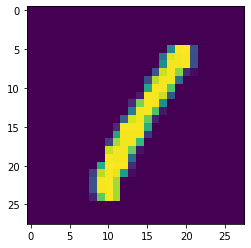

In [115]:
visualize(X.loc[int(y_target[0][0])])

## Split Data

Method 1
Using train_test_split from sklearn

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Method 2
Manual split of the data using slice

In [117]:
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

Shuffling the dataset

In [118]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train.loc[shuffle_index], y_train[shuffle_index]

In [119]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [120]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [121]:
clf.fit(X_train,y_train)

SGDClassifier()

In [124]:
yhat = clf.predict(X_test)
print(yhat)

[7. 2. 1. ... 4. 5. 6.]


In [126]:
correct_clf = sum(y_test == yhat)
print("Accuracy : {}".format(correct_clf/len(y_test)))

Accuracy : 0.9166


### Measuring Accuracy Using Cross Validation

In [138]:
count_table = dict()
for x in y.unique():
  count_table[x] = sum(y == x)

In [143]:
pd.DataFrame.from_dict(count_table, orient='index', columns=['Count']).sort_index()

,Count
0.0,6903
1.0,7877
2.0,6990
3.0,7141
4.0,6824
5.0,6313
6.0,6876
7.0,7293
8.0,6825
9.0,6958


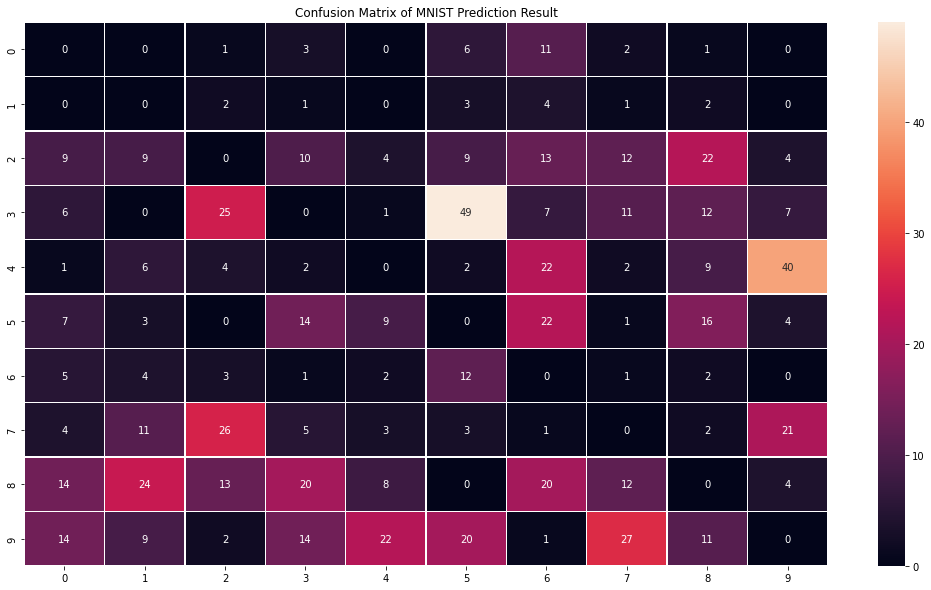

In [151]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(18,10))
matrix = confusion_matrix(y_test,yhat)
matrix[matrix > 50] = 0
sns.heatmap(matrix, annot=True, linewidths=.5)
plt.title("Confusion Matrix of MNIST Prediction Result")
plt.show()

## SVM
One of the hyperparameter in SVM is C. Smaller C leads to a wider area but more margin violations. And bigger C is opposite of the smaller C.

In [61]:
from sklearn import datasets
from sklearn import svm

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
col = ['petal_length', 'petal_width', 'species']
df[col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [9]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
X = df[['petal_length', 'petal_width']]
species_to_num = {'setosa' : 0,
                  'versicolor' : 1,
                  'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [11]:
C = 0.001
clf = svm.SVC(kernel = 'linear',C=C)
clf.fit(X,y)

SVC(C=0.001, kernel='linear')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


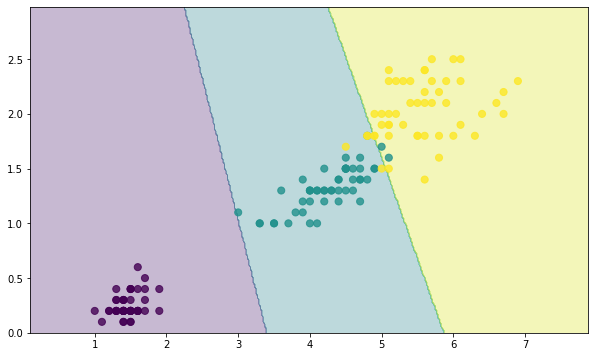

In [23]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


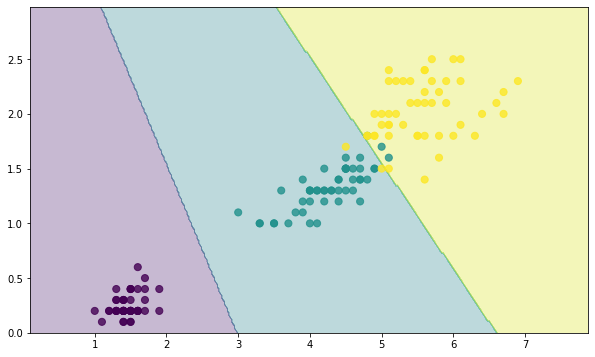

In [25]:
C = 1
clf = svm.SVC(kernel = 'linear',C=C)
clf.fit(X,y)

Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

You can see the different result between smaller C and bigger C

In [27]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [30]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

C = 1
clf = svm.SVC(kernel = 'linear',C=C)
clf.fit(X_train_s,y_train)

SVC(C=1, kernel='linear')

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
res = cross_val_score(clf, X_train_s, y_train, cv = 10, scoring = 'accuracy')
print("Average Score : \t {0:.4f}".format(np.mean(res)))

Average Score : 	 0.9583


In [42]:
X_test_s = s.transform(X_test)
yhat = cross_val_predict(clf, X_test_s, y_test, cv = 5)

<function matplotlib.pyplot.show>

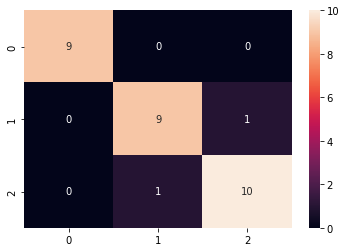

<Figure size 576x576 with 0 Axes>

In [48]:
matrix = confusion_matrix(y_test, yhat)
ax =sns.heatmap(matrix, annot = True)
ax = plt.figure(figsize=(8,8))
plt.show

In [56]:
yhat_train = cross_val_predict(clf, X_train_s, y_train, cv = 5)

In [60]:
print("Score of Training Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_train,
                                                          yhat_train,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_train,
                                                    yhat_train,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}\n".format(f1_score(y_train,
                                            yhat_train,
                                            average='weighted')))
print("Score of Test Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_test,
                                                          yhat,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_test,
                                                    yhat,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}".format(f1_score(y_test,
                                            yhat,
                                            average='weighted')))

Score of Training Data 

Precision Score : 	 0.9585
Recall Score 	: 	 0.9583
F1 Score 	: 	 0.9583

Score of Test Data 

Precision Score : 	 0.9333
Recall Score 	: 	 0.9333
F1 Score 	: 	 0.9333


## Polynomial Kernel

In [72]:
C = 1
clf = svm.SVC(kernel = 'poly', degree = 4, C=C, gamma = 'auto')
clf.fit(X,y)

SVC(C=1, degree=4, gamma='auto', kernel='poly')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


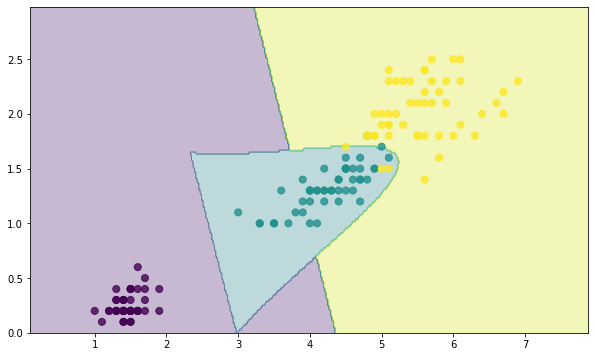

In [73]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

In [79]:
clf = svm.SVC(kernel = 'poly', degree = 5, C=C, gamma = 'auto')
res = cross_val_score(clf, X_train_s, y_train, cv = 10, scoring = 'accuracy')
print("Average Score : \t {0:.4f}".format(np.mean(res)))

Average Score : 	 0.9583


In [80]:
X_test_s = s.transform(X_test)
yhat = cross_val_predict(clf, X_test_s, y_test, cv = 5)

<function matplotlib.pyplot.show>

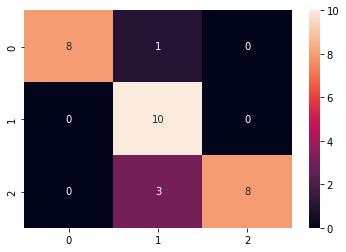

<Figure size 576x576 with 0 Axes>

In [81]:
matrix = confusion_matrix(y_test, yhat)
ax =sns.heatmap(matrix, annot = True)
ax = plt.figure(figsize=(8,8))
plt.show

In [82]:
yhat_train = cross_val_predict(clf, X_train_s, y_train, cv = 5)

In [83]:
print("Score of Training Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_train,
                                                          yhat_train,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_train,
                                                    yhat_train,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}\n".format(f1_score(y_train,
                                            yhat_train,
                                            average='weighted')))
print("Score of Test Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_test,
                                                          yhat,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_test,
                                                    yhat,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}".format(f1_score(y_test,
                                            yhat,
                                            average='weighted')))

Score of Training Data 

Precision Score : 	 0.9630
Recall Score 	: 	 0.9583
F1 Score 	: 	 0.9581

Score of Test Data 

Precision Score : 	 0.9048
Recall Score 	: 	 0.8667
F1 Score 	: 	 0.8689


## Gaussian Radial Basis Function (rbf)

In [86]:
C = 1
clf = svm.SVC(kernel = 'rbf', C=C, gamma = 0.5)
clf.fit(X,y)

SVC(C=1, gamma=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


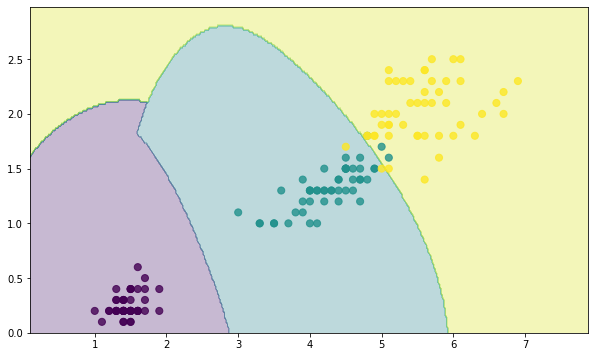

In [87]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

In [88]:
clf = svm.SVC(kernel = 'rbf', C=C, gamma = 0.5)
res = cross_val_score(clf, X_train_s, y_train, cv = 10, scoring = 'accuracy')
print("Average Score : \t {0:.4f}".format(np.mean(res)))

Average Score : 	 0.9583


In [89]:
X_test_s = s.transform(X_test)
yhat = cross_val_predict(clf, X_test_s, y_test, cv = 5)

<function matplotlib.pyplot.show>

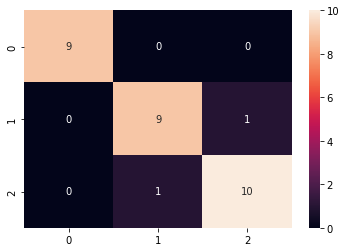

<Figure size 576x576 with 0 Axes>

In [90]:
matrix = confusion_matrix(y_test, yhat)
ax =sns.heatmap(matrix, annot = True)
ax = plt.figure(figsize=(8,8))
plt.show

In [91]:
yhat_train = cross_val_predict(clf, X_train_s, y_train, cv = 5)

In [92]:
print("Score of Training Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_train,
                                                          yhat_train,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_train,
                                                    yhat_train,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}\n".format(f1_score(y_train,
                                            yhat_train,
                                            average='weighted')))
print("Score of Test Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_test,
                                                          yhat,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_test,
                                                    yhat,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}".format(f1_score(y_test,
                                            yhat,
                                            average='weighted')))

Score of Training Data 

Precision Score : 	 0.9585
Recall Score 	: 	 0.9583
F1 Score 	: 	 0.9583

Score of Test Data 

Precision Score : 	 0.9333
Recall Score 	: 	 0.9333
F1 Score 	: 	 0.9333


### Grid Search

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [97]:
pipeline = Pipeline([('clf', svm.SVC(kernel = 'rbf', C = 1, gamma=0.1))])

In [102]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5),
          'clf__gamma':(0.001, 0.01, 0.1, 1)}

In [103]:
svm_grid = GridSearchCV(pipeline, params, cv = 3, scoring = 'accuracy')

In [104]:
svm_grid.fit(X_train_s, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5),
                         'clf__gamma': (0.001, 0.01, 0.1, 1)},
             scoring='accuracy')

In [105]:
svm_grid.best_score_

0.9666666666666667

In [108]:
svm_grid.best_estimator_

Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))])

In [109]:
yhat_train = cross_val_predict(svm_grid, X_train_s, y_train, cv = 5)

In [110]:
yhat = cross_val_predict(svm_grid, X_test_s, y_test, cv = 5)

In [111]:
print("Score of Training Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_train,
                                                          yhat_train,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_train,
                                                    yhat_train,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}\n".format(f1_score(y_train,
                                            yhat_train,
                                            average='weighted')))
print("Score of Test Data \n")
print("Precision Score : \t {0:.4f}".format(precision_score(y_test,
                                                          yhat,
                                                          average='weighted')))
print("Recall Score \t: \t {0:.4f}".format(recall_score(y_test,
                                                    yhat,
                                                    average='weighted')))
print("F1 Score \t: \t {0:.4f}".format(f1_score(y_test,
                                            yhat,
                                            average='weighted')))

Score of Training Data 

Precision Score : 	 0.9585
Recall Score 	: 	 0.9583
F1 Score 	: 	 0.9583

Score of Test Data 

Precision Score : 	 0.9333
Recall Score 	: 	 0.9333
F1 Score 	: 	 0.9333
